In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.utils import resample
from scipy.stats import shapiro, mannwhitneyu


In [ ]:
#Data Preparation
# Load datasets
match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')
match_info_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_info_data.csv')

<ipython-input-2-a7491dca9b00>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')


In [ ]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [ ]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [ ]:
# Data preparation and feature engineering
match_info_data['date'] = pd.to_datetime(match_info_data['date'])


In [ ]:
# Calculate total runs scored by each batting team per match
team_runs_per_match = match_data.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()

team_runs_per_match


,match_id,batting_team,runs_off_bat
0,335982,Kolkata Knight Riders,205
1,335982,Royal Challengers Bangalore,63
2,335983,Chennai Super Kings,234
3,335983,Kings XI Punjab,196
4,335984,Delhi Daredevils,122
...,...,...,...
2040,1370351,Mumbai Indians,166
2041,1370352,Gujarat Titans,223
2042,1370352,Mumbai Indians,164
2043,1370353,Chennai Super Kings,166


In [ ]:
team_runs_per_match.rename(columns={'runs_off_bat': 'total_runs'}, inplace=True)



In [ ]:
print("team_runs_per_match columns:", team_runs_per_match.columns)
print("match_info_data columns:", match_info_data.columns)



team_runs_per_match columns: Index(['match_id', 'batting_team', 'total_runs'], dtype='object')
match_info_data columns: Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [ ]:
merged = pd.merge(
    team_runs_per_match,
    match_info_data.rename(columns={'id': 'match_id'})[['match_id', 'date', 'venue', 'team1', 'team2']],
    on='match_id',
    how='left'
)


In [ ]:
merged.head()

,match_id,batting_team,total_runs,date,venue,team1,team2
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals


In [ ]:
from scipy.stats import shapiro

# Example data: replace with your data array/column
data = merged['total_runs']  # or any numerical column you want to test

# Perform Shapiro-Wilk test
stat, p_value = shapiro(data)

print(f'Statistic={stat:.4f}, p-value={p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistic=0.9932, p-value=0.0000
Sample does not look Gaussian (reject H0)


In [ ]:
print(merged.columns.tolist())

# Extract year from the 'date' datetime column
merged['year'] = merged['date'].dt.year

# Now create 'period' based on year
merged['period'] = np.where(merged['year'] < 2018, 'pre', 'post')



['match_id', 'batting_team', 'total_runs', 'date', 'venue', 'team1', 'team2']


In [ ]:
from scipy.stats import shapiro
import numpy as np

# Assuming 'period' and 'total_runs' are columns in merged DataFrame
pre_scores = merged[merged['period'] == 'pre']['total_runs']
post_scores = merged[merged['period'] == 'post']['total_runs']

# For large samples (>500), you might want to use a random sample to perform Shapiro test
# (Shapiro is sensitive to large sample sizes)
random_state = 1
sample_size = 500

if len(pre_scores) > sample_size:
    pre_sample = pre_scores.sample(sample_size, random_state=random_state)
else:
    pre_sample = pre_scores

if len(post_scores) > sample_size:
    post_sample = post_scores.sample(sample_size, random_state=random_state)
else:
    post_sample = post_scores

# Shapiro-Wilk test
pre_stat, pre_p = shapiro(pre_sample)
post_stat, post_p = shapiro(post_sample)

print(f"Shapiro-Wilk Test (Pre): statistic={pre_stat:.4f}, p-value={pre_p:.4f}")
print(f"Shapiro-Wilk Test (Post): statistic={post_stat:.4f}, p-value={post_p:.4f}")


Shapiro-Wilk Test (Pre): statistic=0.9884, p-value=0.0005
Shapiro-Wilk Test (Post): statistic=0.9845, p-value=0.0000


In [ ]:
# Step 1: Extract season from date
match_info_data['season'] = match_info_data['date'].dt.year

# Step 2: Assign match number within each season
match_info_data['match_number'] = match_info_data.groupby('season')['date'].rank(method='first', ascending=True)

# Step 3: Count total matches per season
match_counts = match_info_data.groupby('season')['id'].nunique().reset_index()
match_counts.columns = ['season', 'match_count']

# Step 4: Merge match counts back into match_info_data
match_info_data = pd.merge(match_info_data, match_counts, on='season', how='left')

# Step 5: Identify playoff matches (e.g., last 4 matches of the season)
match_info_data['is_playoff'] = match_info_data['match_number'] > (match_info_data['match_count'] - 4)

# Step 6: Merge this playoff indicator into the main merged dataset
merged = pd.merge(merged, match_info_data[['id', 'is_playoff']], left_on='match_id', right_on='id', how='left')

# Step 7: Drop the duplicate 'id' column after merge
merged.drop(columns=['id'], inplace=True)


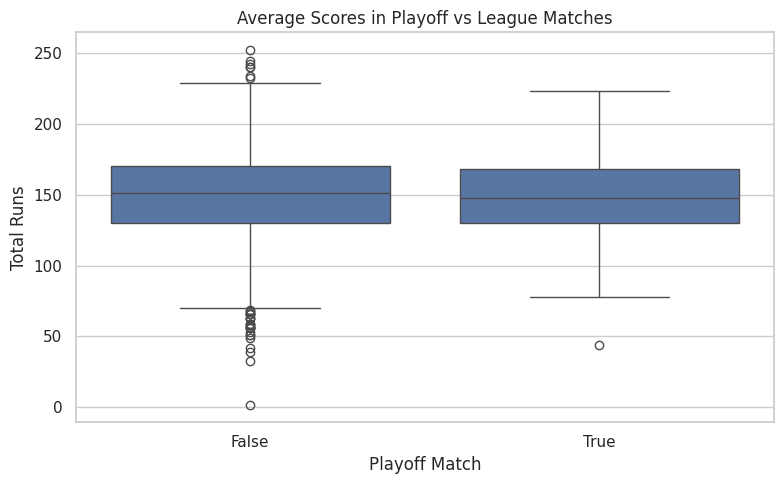

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot: Average Runs in Playoffs vs League Matches
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_playoff', y='total_runs')

# Customize labels and title
plt.title("Average Scores in Playoff vs League Matches")
plt.xlabel("Playoff Match")
plt.ylabel("Total Runs")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Separate scores based on 'is_playoff' flag
league_scores = merged[merged['is_playoff'] == False]['total_runs']
playoff_scores = merged[merged['is_playoff'] == True]['total_runs']

# Run Mann–Whitney U test
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

# Display results
print(f"U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("✅ The difference in scores between playoffs and league matches is statistically significant.")
else:
    print("❌ No statistically significant difference in scores between playoffs and league matches.")


U Statistic: 124606.0
P-value: 0.7668706992141119
❌ No statistically significant difference in scores between playoffs and league matches.


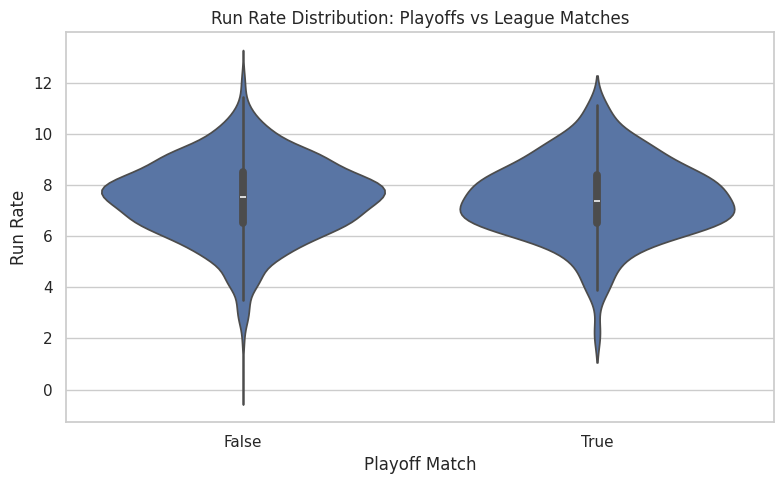

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'run_rate' is calculated
# If not already present, compute it as total_runs / overs
# Assuming each match has 20 overs for simplicity
if 'run_rate' not in merged.columns:
    merged['run_rate'] = merged['total_runs'] / 20

# Violin plot: Run Rate Trends
plt.figure(figsize=(8, 5))
sns.violinplot(data=merged, x='is_playoff', y='run_rate')

# Labels and title
plt.title("Run Rate Distribution: Playoffs vs League Matches")
plt.xlabel("Playoff Match")
plt.ylabel("Run Rate")

# Layout and display
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

teams = merged['batting_team'].unique()

for team in teams:
    # Filter data for this team only
    team_data = merged[merged['batting_team'] == team]

    # Split into league and playoff scores
    league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
    playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

    # Avoid comparing if sample size is too small
    if len(playoff_scores) >= 3 and len(league_scores) >= 3:
        u_stat, p_val = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')
        significance = '✅ Significant' if p_val < 0.05 else '❌ Not Significant'
        print(f"{team}: p-value = {p_val:.4f} → {significance}")
    else:
        print(f"{team}: Not enough data to compare.")


Kolkata Knight Riders: p-value = 0.8206 → ❌ Not Significant
Royal Challengers Bangalore: p-value = 0.4337 → ❌ Not Significant
Chennai Super Kings: p-value = 0.3327 → ❌ Not Significant
Kings XI Punjab: p-value = 0.6591 → ❌ Not Significant
Delhi Daredevils: p-value = 0.0892 → ❌ Not Significant
Rajasthan Royals: p-value = 0.8971 → ❌ Not Significant
Mumbai Indians: p-value = 0.4349 → ❌ Not Significant
Deccan Chargers: p-value = 0.0997 → ❌ Not Significant
Kochi Tuskers Kerala: Not enough data to compare.
Pune Warriors: Not enough data to compare.
Sunrisers Hyderabad: p-value = 0.7162 → ❌ Not Significant
Rising Pune Supergiants: Not enough data to compare.
Gujarat Lions: Not enough data to compare.
Rising Pune Supergiant: Not enough data to compare.
Delhi Capitals: p-value = 0.9859 → ❌ Not Significant
Punjab Kings: Not enough data to compare.
Gujarat Titans: p-value = 0.4976 → ❌ Not Significant
Lucknow Super Giants: Not enough data to compare.


In [ ]:
# Add home/away team flags
merged['home_team'] = merged['batting_team'] == merged['team1']
merged['away_team'] = merged['batting_team'] == merged['team2']


In [ ]:
merged.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,year,period,is_playoff,run_rate,home_team,away_team
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008,pre,False,10.25,False,True
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008,pre,False,3.15,True,False
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,2008,pre,False,11.70,False,True
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,2008,pre,False,9.80,True,False
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,2008,pre,False,6.10,True,False


In [ ]:
melted = pd.melt(
    merged,
    id_vars=['total_runs'],
    value_vars=['home_team', 'away_team'],
    var_name='location',
    value_name='is_true'
)


<ipython-input-22-a9130046405b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=home_away_df, x='location', y='total_runs', palette='Set2')


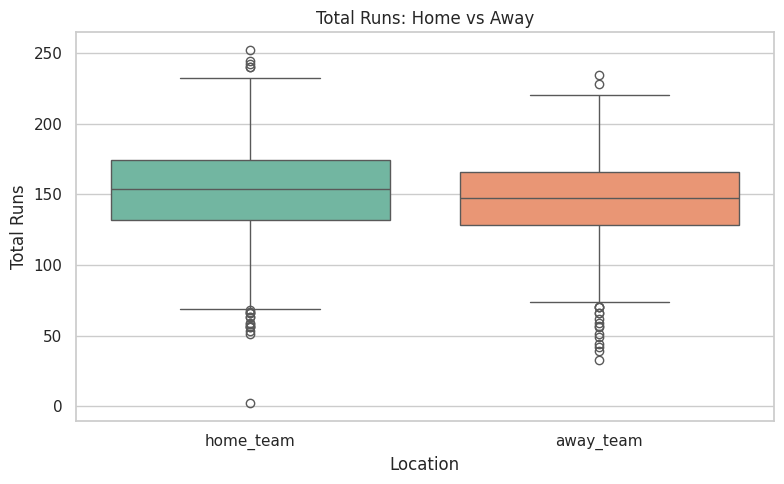

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Melt the merged DataFrame to long format
home_away_df = pd.melt(
    merged,
    id_vars=['total_runs'],
    value_vars=['home_team', 'away_team'],
    var_name='location',
    value_name='is_true'
)

# Step 2: Filter only where is_true == True
home_away_df = home_away_df[home_away_df['is_true'] == True]

# Step 3: Plot the average runs using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=home_away_df, x='location', y='total_runs', palette='Set2')
plt.title("Total Runs: Home vs Away")
plt.xlabel("Location")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()


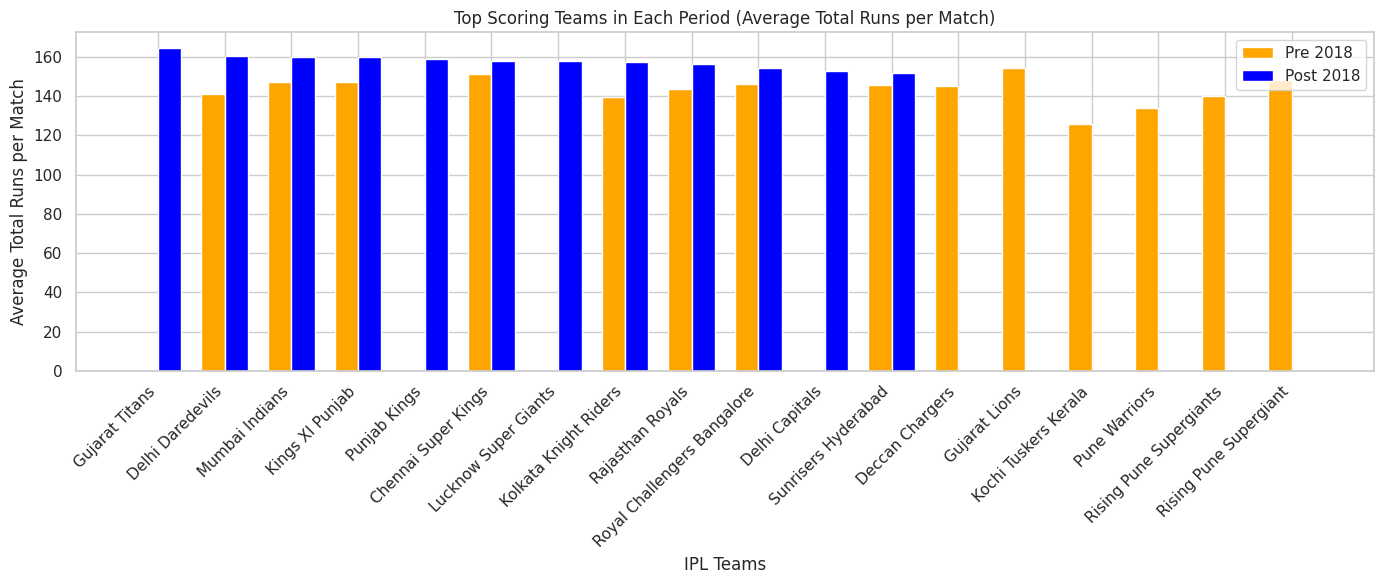

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure 'date' column exists and period is labeled
merged['period'] = merged['date'].dt.year.apply(lambda x: 'Post' if x >= 2018 else 'Pre')

# Step 2: Group by team and period, then compute average total runs
avg_runs = merged.groupby(['batting_team', 'period'])['total_runs'].mean().reset_index()

# Step 3: Pivot for grouped bar format
pivot_df = avg_runs.pivot(index='batting_team', columns='period', values='total_runs').fillna(0)

# Sort by total average (Post or Pre — pick one for order)
pivot_df = pivot_df.sort_values(by='Post', ascending=False)

# Step 4: Plot grouped bar chart
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(len(pivot_df))

# Bars
plt.bar(index, pivot_df['Pre'], bar_width, label='Pre 2018', color='orange')
plt.bar([i + bar_width for i in index], pivot_df['Post'], bar_width, label='Post 2018', color='blue')

# Labels and formatting
plt.xlabel('IPL Teams')
plt.ylabel('Average Total Runs per Match')
plt.title('Top Scoring Teams in Each Period (Average Total Runs per Match)')
plt.xticks([i + bar_width / 2 for i in index], pivot_df.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
min_matches = 10

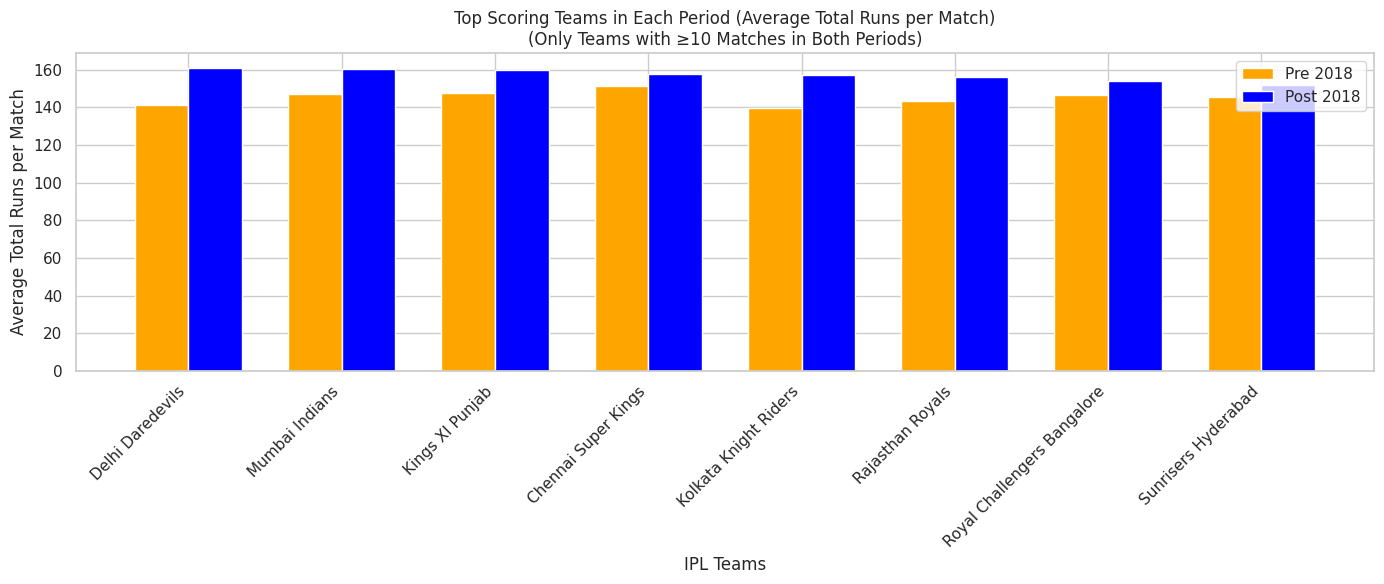

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Add 'period' column
merged['period'] = merged['date'].dt.year.apply(lambda x: 'Post' if x >= 2018 else 'Pre')

# Step 2: Count number of matches per team per period
match_counts = merged.groupby(['batting_team', 'period'])['match_id'].nunique().reset_index(name='match_count')

# Step 3: Filter to teams with at least 10 matches in both periods
valid_teams = match_counts[match_counts['match_count'] >= 10]
team_period_counts = valid_teams.groupby('batting_team')['period'].nunique().reset_index()
qualified_teams = team_period_counts[team_period_counts['period'] == 2]['batting_team']

# Step 4: Compute average total runs per match for qualified teams only
filtered_data = merged[merged['batting_team'].isin(qualified_teams)]
avg_runs = filtered_data.groupby(['batting_team', 'period'])['total_runs'].mean().reset_index()

# Step 5: Pivot for grouped bar plot
pivot_df = avg_runs.pivot(index='batting_team', columns='period', values='total_runs').fillna(0)
pivot_df = pivot_df.sort_values(by='Post', ascending=False)

# Step 6: Plot
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(len(pivot_df))

plt.bar(index, pivot_df['Pre'], bar_width, label='Pre 2018', color='orange')
plt.bar([i + bar_width for i in index], pivot_df['Post'], bar_width, label='Post 2018', color='blue')

plt.xlabel('IPL Teams')
plt.ylabel('Average Total Runs per Match')
plt.title('Top Scoring Teams in Each Period (Average Total Runs per Match)\n(Only Teams with ≥10 Matches in Both Periods)')
plt.xticks([i + bar_width / 2 for i in index], pivot_df.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pivot_df

period,Post,Pre
batting_team,,
Delhi Daredevils,160.714286,141.306122
Mumbai Indians,160.188889,147.178344
Kings XI Punjab,159.857143,147.479730
Chennai Super Kings,157.728261,151.320611
Kolkata Knight Riders,157.393258,139.594595
Rajasthan Royals,156.329545,143.452991
Royal Challengers Bangalore,154.159091,146.342105
Sunrisers Hyderabad,151.855556,145.631579


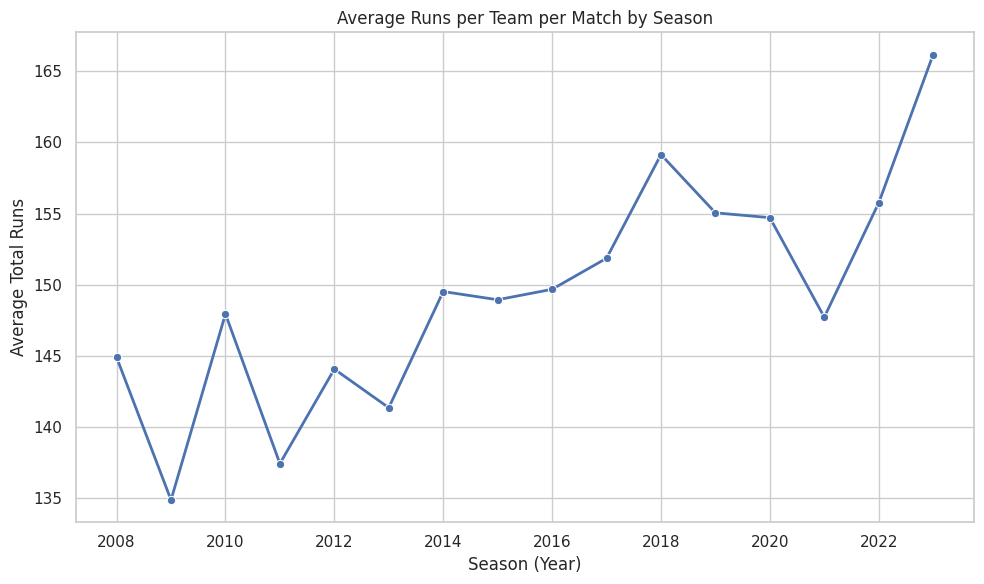

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year' column exists
merged['year'] = merged['date'].dt.year

# Group by year and calculate average total runs
seasonal_avg = merged.groupby('year')['total_runs'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_avg, x='year', y='total_runs', marker='o', linewidth=2)

plt.title('Average Runs per Team per Match by Season')
plt.xlabel('Season (Year)')
plt.ylabel('Average Total Runs')
plt.grid(True)
plt.tight_layout()
plt.show()


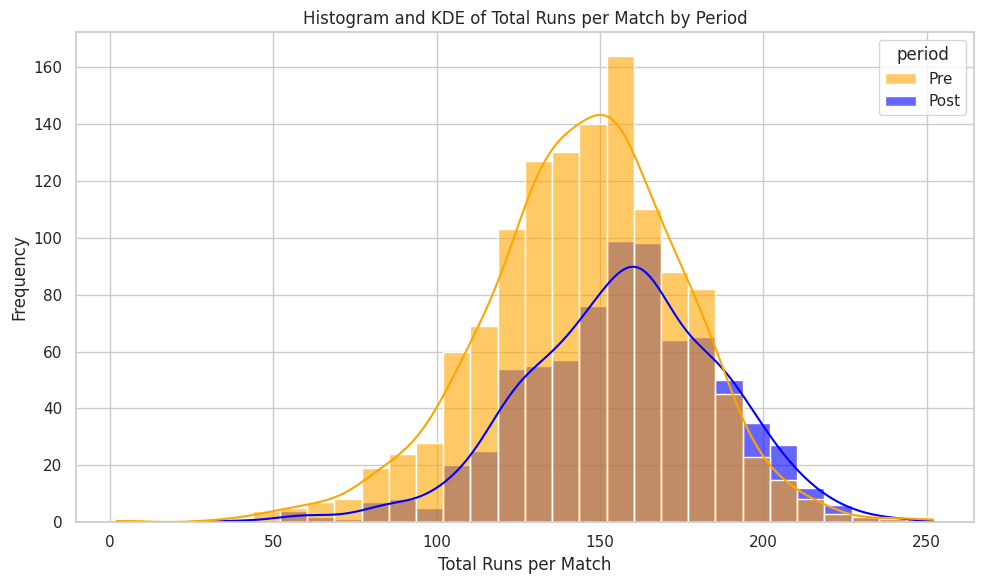

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'period' column exists
merged['period'] = merged['date'].dt.year.apply(lambda x: 'Post' if x >= 2018 else 'Pre')

# Plot histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=merged, x='total_runs', hue='period', kde=True, bins=30, palette=['orange', 'blue'], alpha=0.6)

plt.title('Histogram and KDE of Total Runs per Match by Period')
plt.xlabel('Total Runs per Match')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

# Ensure data is split by period
merged['period'] = merged['date'].dt.year.apply(lambda x: 'Post' if x >= 2018 else 'Pre')
pre_scores = merged[merged['period'] == 'Pre']['total_runs']
post_scores = merged[merged['period'] == 'Post']['total_runs']

# Mann–Whitney U Test (non-parametric)
u_stat, p_val = mannwhitneyu(pre_scores, post_scores, alternative='two-sided')

print(f"U Test: U-statistic = {u_stat}")
print(f"P-value = {p_val:.4f}")
if p_val < 0.05:
    print("✅ Statistically significant difference in total runs between Pre and Post periods.")
else:
    print("❌ No statistically significant difference in total runs between Pre and Post periods.")

# Effect Size: Cohen's d (on parametric assumption)
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohen_d(post_scores, pre_scores)
print(f"Cohen's d Effect Size: {d:.4f}")


U Test: U-statistic = 381621.5
P-value = 0.0000
✅ Statistically significant difference in total runs between Pre and Post periods.
Cohen's d Effect Size: 0.3902


In [ ]:
from sklearn.utils import resample
import numpy as np

# Define bootstrap function
def bootstrap_diff_means(x, y, n_bootstraps=10000, random_state=None):
    np.random.seed(random_state)
    diffs = []

    for _ in range(n_bootstraps):
        x_resample = resample(x)
        y_resample = resample(y)
        diff = np.mean(y_resample) - np.mean(x_resample)
        diffs.append(diff)

    ci_bounds = np.percentile(diffs, [2.5, 97.5])
    mean_diff = np.mean(diffs)
    return ci_bounds, mean_diff

# Run the bootstrap
ci_bounds, mean_diff = bootstrap_diff_means(pre_scores, post_scores)

# Print result
print("📊 Bootstrap 95% Confidence Interval for Mean Difference:", ci_bounds)
print("📈 Bootstrap Mean Difference:", mean_diff)


📊 Bootstrap 95% Confidence Interval for Mean Difference: [ 9.16510973 14.62919152]
📈 Bootstrap Mean Difference: 11.943719488950975
